In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from pathlib import Path

In [2]:
def infection(S, I, N, iterations):    
    for i in range(iterations):
        S, I = S - beta * ((S * I) / N), I + beta * ((S * I) / N)
        S_comp.append(S)
        I_comp.append(I)

## Densité population 1/2

### 5000 individus

In [3]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur2/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur2/population5000"

In [4]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init     Run  Mesures  Close   Total
0    13  828400        0      0  828415


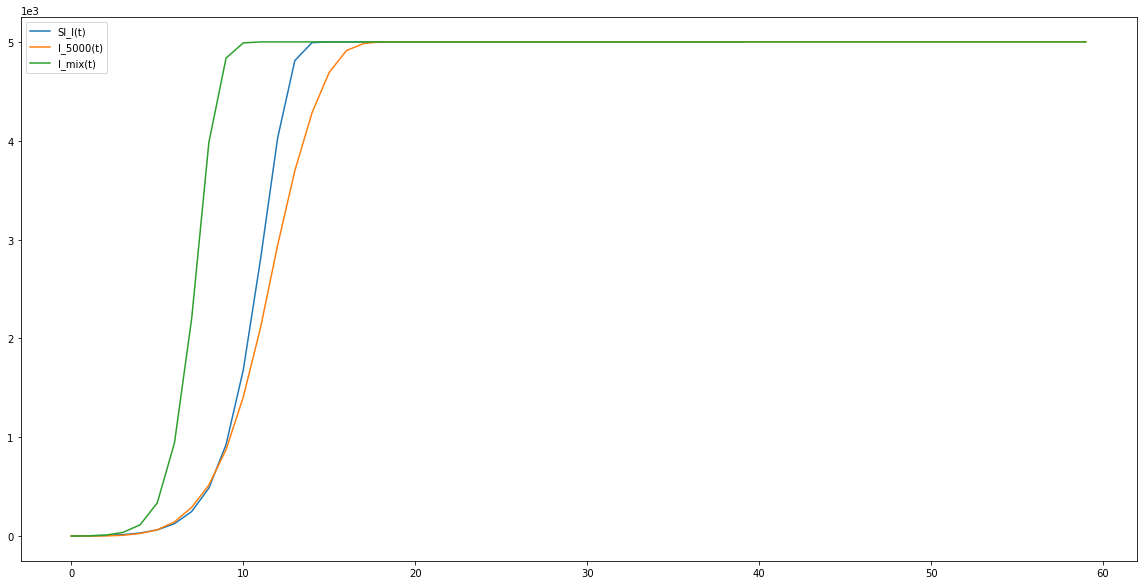

In [5]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 5000 # S + I = N
beta = 1
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations)
figure = plt.figure(figsize=(20, 10))

SI_I, = plt.plot(I_comp, label='SI_I(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_mix(t)')

plt.legend(handles=[SI_I, I_5000, I_mix])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

#plt.xlim([0, 200])
plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus['Nombre de contaminés'].values.tolist(),S_comp)).mean())

### 20000 individus

In [6]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur2/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur2/population20000"

In [7]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   246  2510138        2      1  2510388


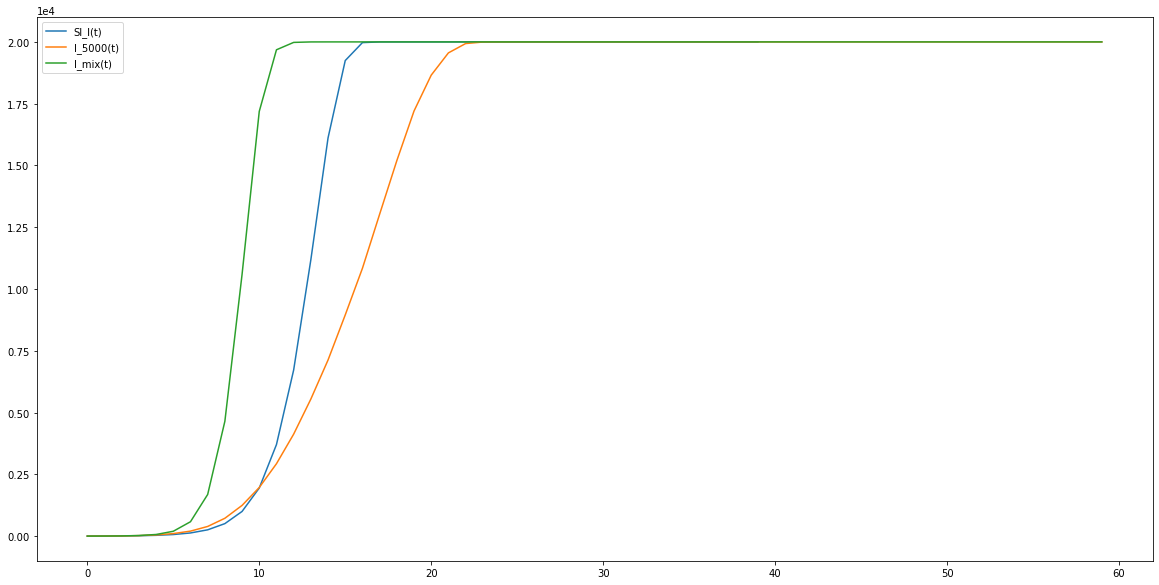

In [8]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 20000 # S + I = N
beta = 1
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations)
figure = plt.figure(figsize=(20, 10))

SI_I, = plt.plot(I_comp, label='SI_I(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_mix(t)')

plt.legend(handles=[SI_I, I_5000, I_mix])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

#plt.xlim([0, 200])
plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus['Nombre de contaminés'].values.tolist(),S_comp)).mean())

### 50000 individus

In [9]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur2/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur2/population50000"

In [10]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   462  4502632        6      4  4503105


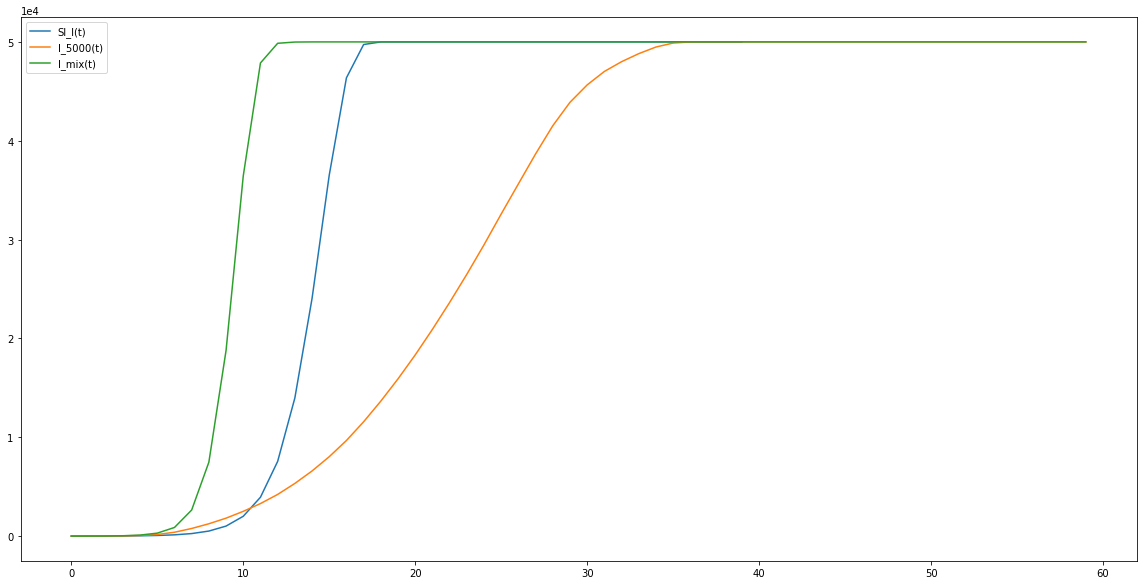

In [11]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 50000 # S + I = N
beta = 1
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations)
figure = plt.figure(figsize=(20, 10))

SI_I, = plt.plot(I_comp, label='SI_I(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_mix(t)')

plt.legend(handles=[SI_I, I_5000, I_mix])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

#plt.xlim([0, 200])
plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus['Nombre de contaminés'].values.tolist(),S_comp)).mean())

### 100000 individus

In [12]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur2/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur2/population100000"

In [13]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   481  6098587       10      3  6099083


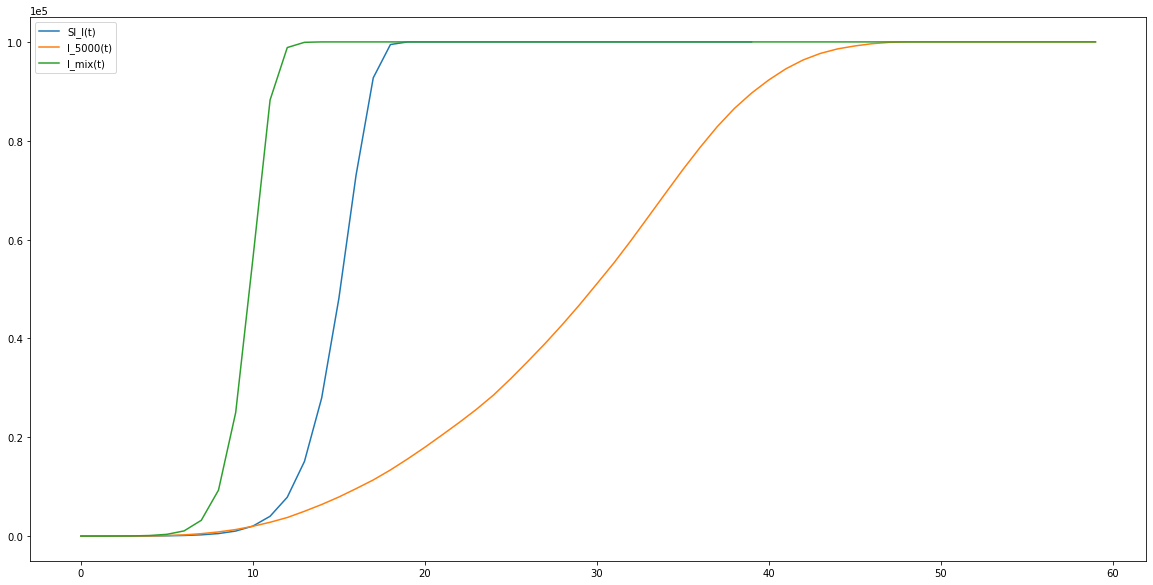

In [14]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 100000 # S + I = N
beta = 1
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations)
figure = plt.figure(figsize=(20, 10))

SI_I, = plt.plot(I_comp, label='SI_I(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_mix(t)')

plt.legend(handles=[SI_I, I_5000, I_mix])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

#plt.xlim([0, 200])
plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus['Nombre de contaminés'].values.tolist(),S_comp)).mean())

## Densité population 1/4

### 5000 individus

In [15]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur4/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur4/population5000"

In [16]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init     Run  Mesures  Close   Total
0    16  923706       22      0  923746


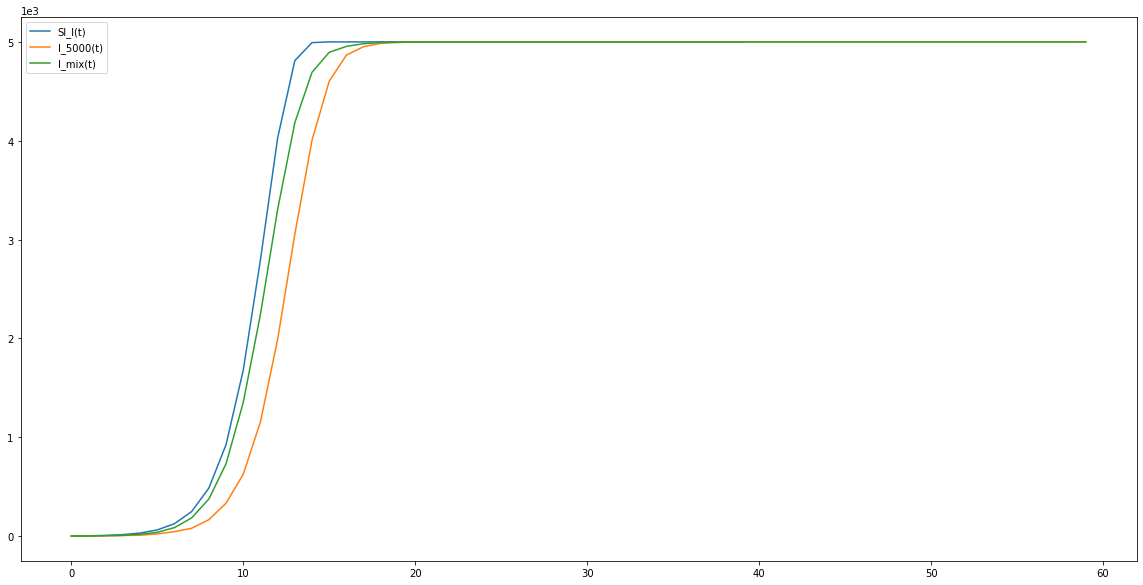

In [17]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 5000 # S + I = N
beta = 1
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations)
figure = plt.figure(figsize=(20, 10))

SI_I, = plt.plot(I_comp, label='SI_I(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_mix(t)')

plt.legend(handles=[SI_I, I_5000, I_mix])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

#plt.xlim([0, 200])
plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus['Nombre de contaminés'].values.tolist(),S_comp)).mean())

### 20000 individus

In [18]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur4/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur4/population20000"

In [19]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0    48  2801536        2      1  2801588


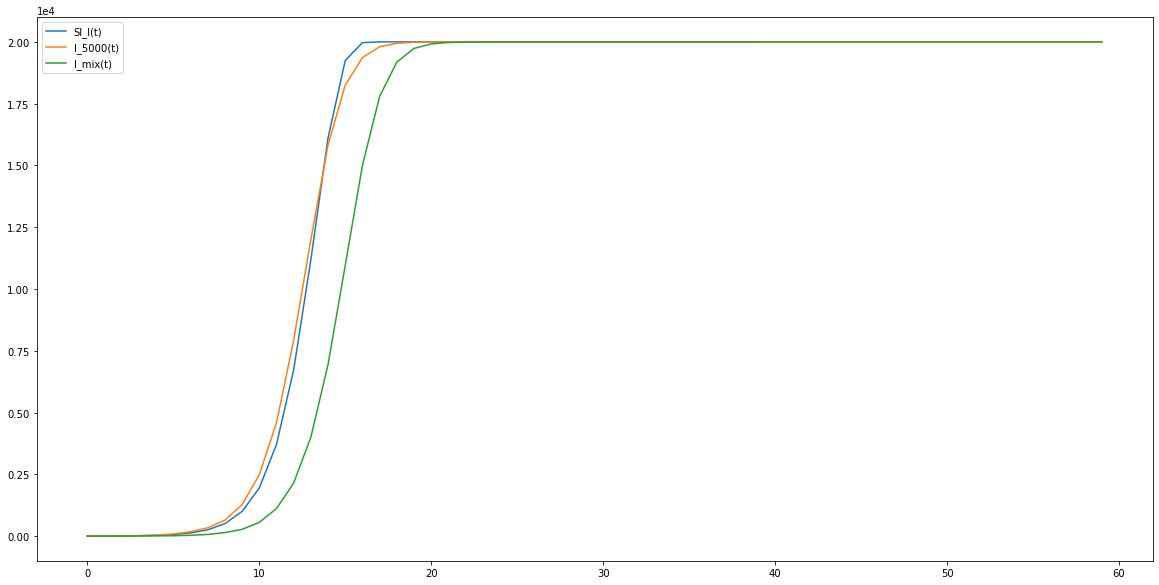

In [20]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 20000 # S + I = N
beta = 1
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations)
figure = plt.figure(figsize=(20, 10))

SI_I, = plt.plot(I_comp, label='SI_I(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_mix(t)')

plt.legend(handles=[SI_I, I_5000, I_mix])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

#plt.xlim([0, 200])
plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus['Nombre de contaminés'].values.tolist(),S_comp)).mean())

### 50000 individus

In [21]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur4/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur4/population50000"

In [22]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   527  4903111        5      3  4903648


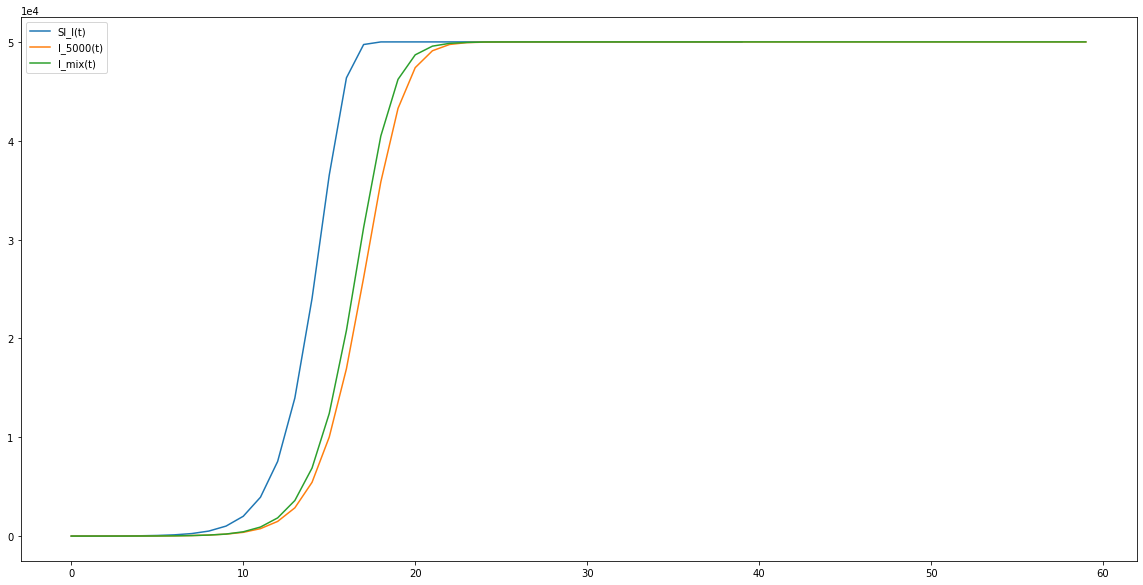

In [23]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 50000 # S + I = N
beta = 1
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations)
figure = plt.figure(figsize=(20, 10))

SI_I, = plt.plot(I_comp, label='SI_I(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_mix(t)')

plt.legend(handles=[SI_I, I_5000, I_mix])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

#plt.xlim([0, 200])
plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus['Nombre de contaminés'].values.tolist(),S_comp)).mean())

### 100000 individus

In [24]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur4/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur4/population100000"

In [25]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   901  6595848        5      3  6596758


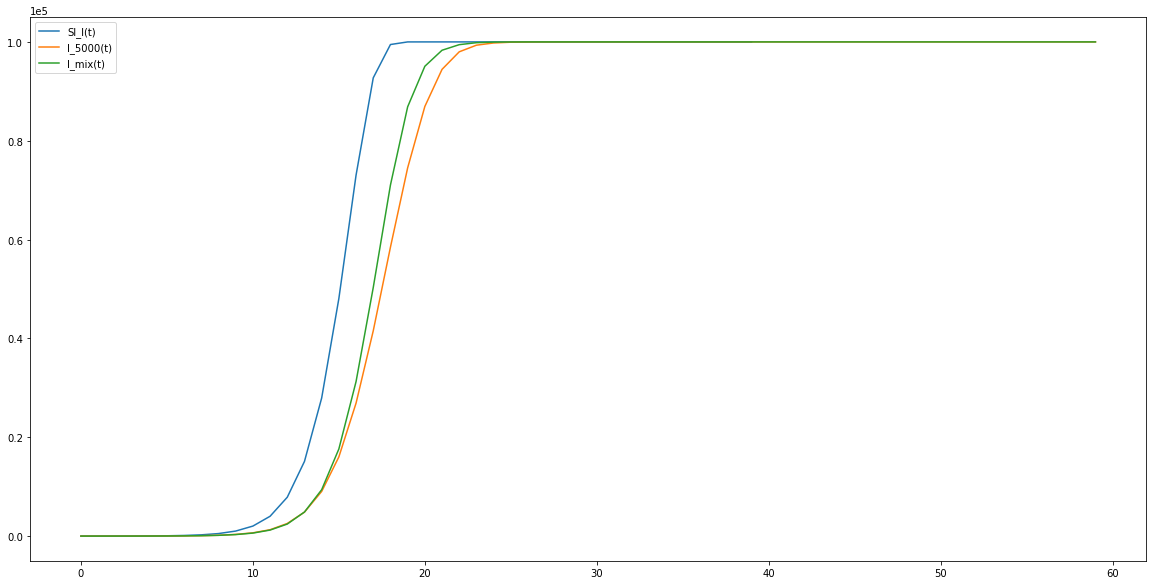

In [26]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 100000 # S + I = N
beta = 1
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations)
figure = plt.figure(figsize=(20, 10))

SI_I, = plt.plot(I_comp, label='SI_I(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_mix(t)')

plt.legend(handles=[SI_I, I_5000, I_mix])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

#plt.xlim([0, 200])
plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus['Nombre de contaminés'].values.tolist(),S_comp)).mean())

## Densité population 1/8

### 5000 individus

In [27]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur8/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur8/population5000"

In [28]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init     Run  Mesures  Close   Total
0    36  931614        0      0  931652


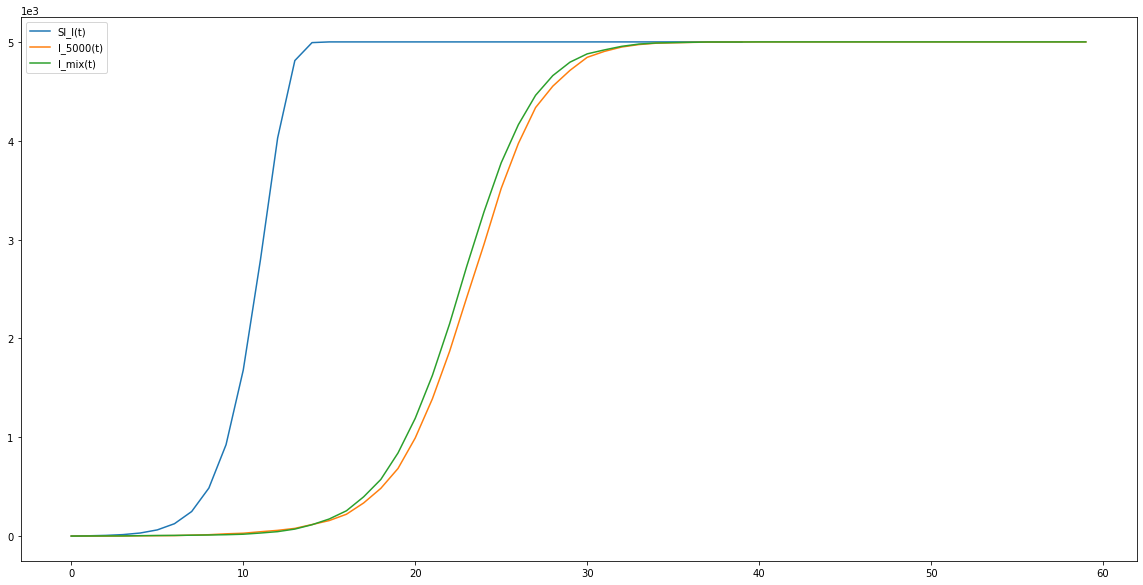

In [29]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 5000 # S + I = N
beta = 1
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations)
figure = plt.figure(figsize=(20, 10))

SI_I, = plt.plot(I_comp, label='SI_I(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_mix(t)')

plt.legend(handles=[SI_I, I_5000, I_mix])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

#plt.xlim([0, 200])
plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus['Nombre de contaminés'].values.tolist(),S_comp)).mean())

### 20000 individus

In [30]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur8/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur8/population20000"

In [31]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   172  2768041        3      1  2768219


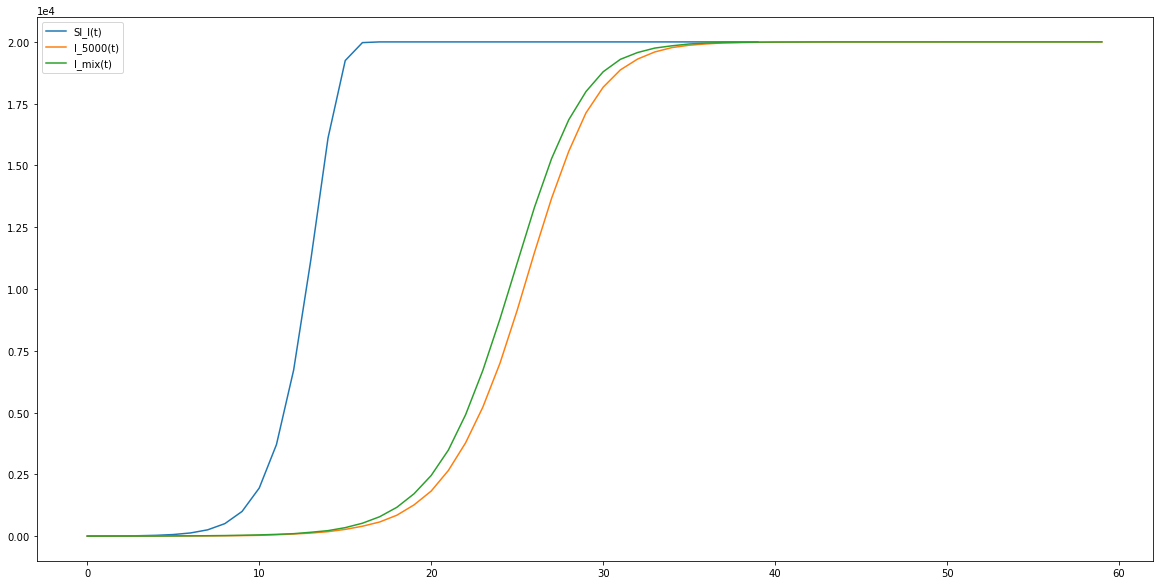

In [32]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 20000 # S + I = N
beta = 1
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations)
figure = plt.figure(figsize=(20, 10))

SI_I, = plt.plot(I_comp, label='SI_I(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_mix(t)')

plt.legend(handles=[SI_I, I_5000, I_mix])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

#plt.xlim([0, 200])
plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus['Nombre de contaminés'].values.tolist(),S_comp)).mean())

### 50000 individus

In [33]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur8/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur8/population50000"

In [34]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   244  4871804        5      3  4872056


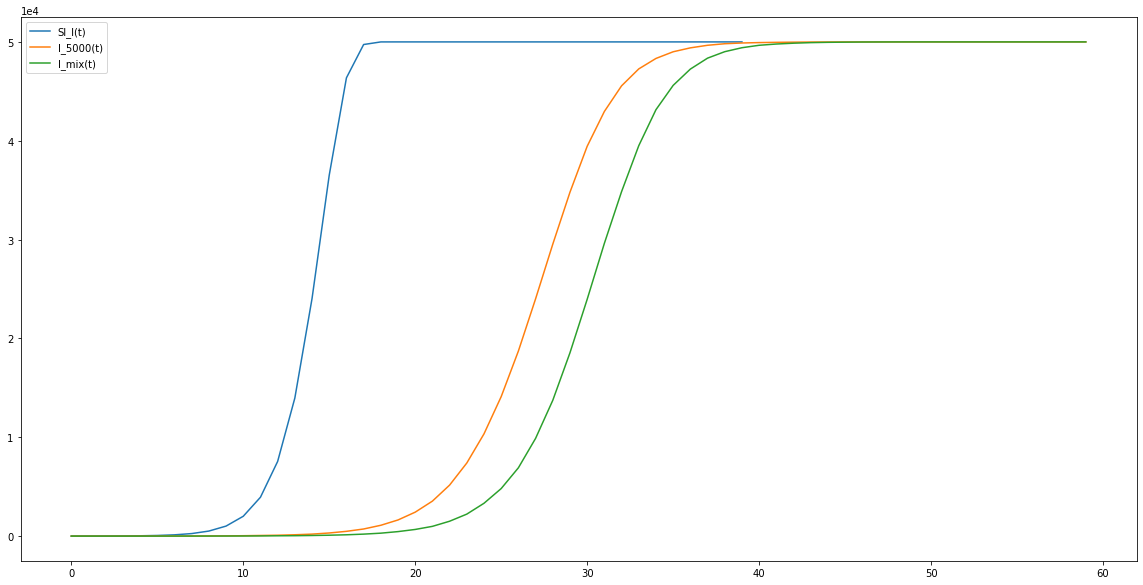

In [35]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 50000 # S + I = N
beta = 1
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations)
figure = plt.figure(figsize=(20, 10))

SI_I, = plt.plot(I_comp, label='SI_I(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_mix(t)')

plt.legend(handles=[SI_I, I_5000, I_mix])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

#plt.xlim([0, 200])
plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus['Nombre de contaminés'].values.tolist(),S_comp)).mean())

### 100000 individus

In [36]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur8/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur8/population100000"

In [37]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   675  6562540        4      3  6563225


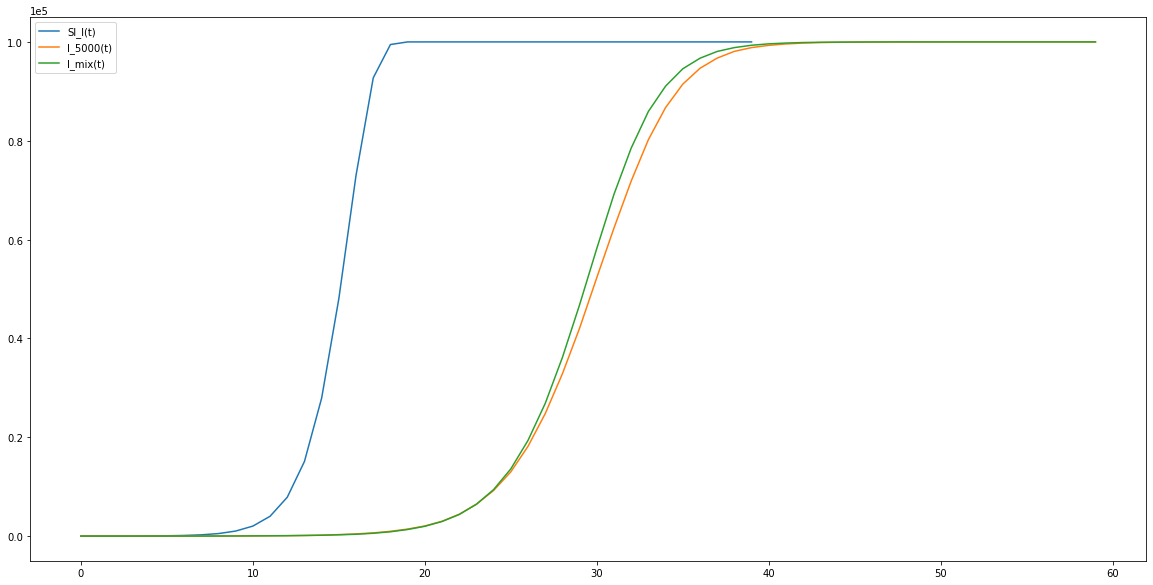

In [38]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 100000 # S + I = N
beta = 1
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations)
figure = plt.figure(figsize=(20, 10))

SI_I, = plt.plot(I_comp, label='SI_I(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_mix(t)')

plt.legend(handles=[SI_I, I_5000, I_mix])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

#plt.xlim([0, 200])
plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus['Nombre de contaminés'].values.tolist(),S_comp)).mean())

## Densité population 1/16

### 5000 individus

In [39]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur16/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur16/population5000"

In [40]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init     Run  Mesures  Close   Total
0   443  842220        5      0  842670


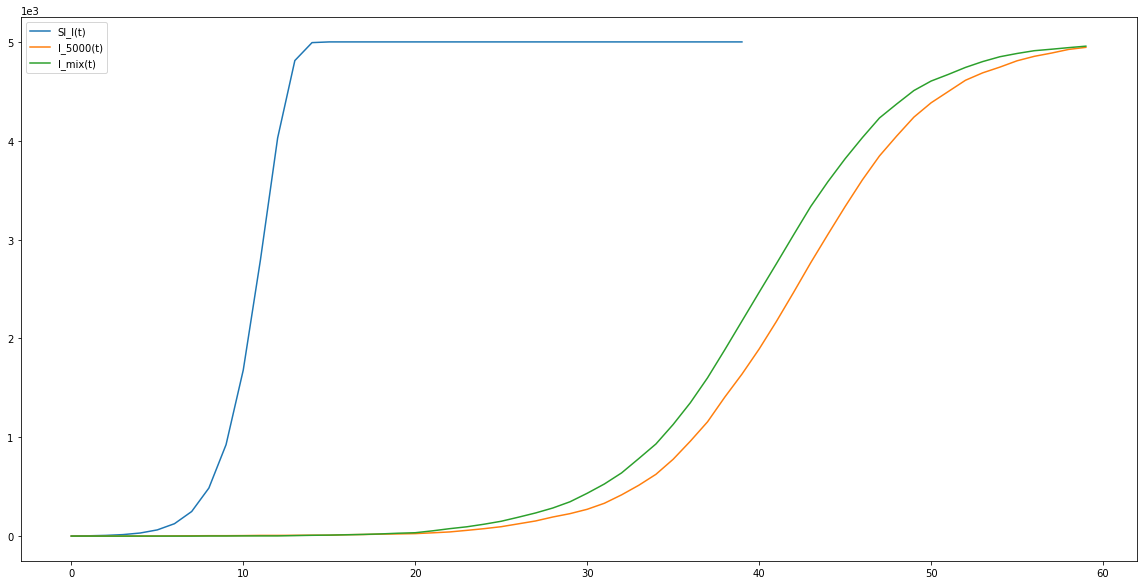

In [41]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 5000 # S + I = N
beta = 1
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations)
figure = plt.figure(figsize=(20, 10))

SI_I, = plt.plot(I_comp, label='SI_I(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_mix(t)')

plt.legend(handles=[SI_I, I_5000, I_mix])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

#plt.xlim([0, 200])
plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus['Nombre de contaminés'].values.tolist(),S_comp)).mean())

### 20000 individus

In [42]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur16/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur16/population20000"

In [43]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   328  2397585        2      1  2397917


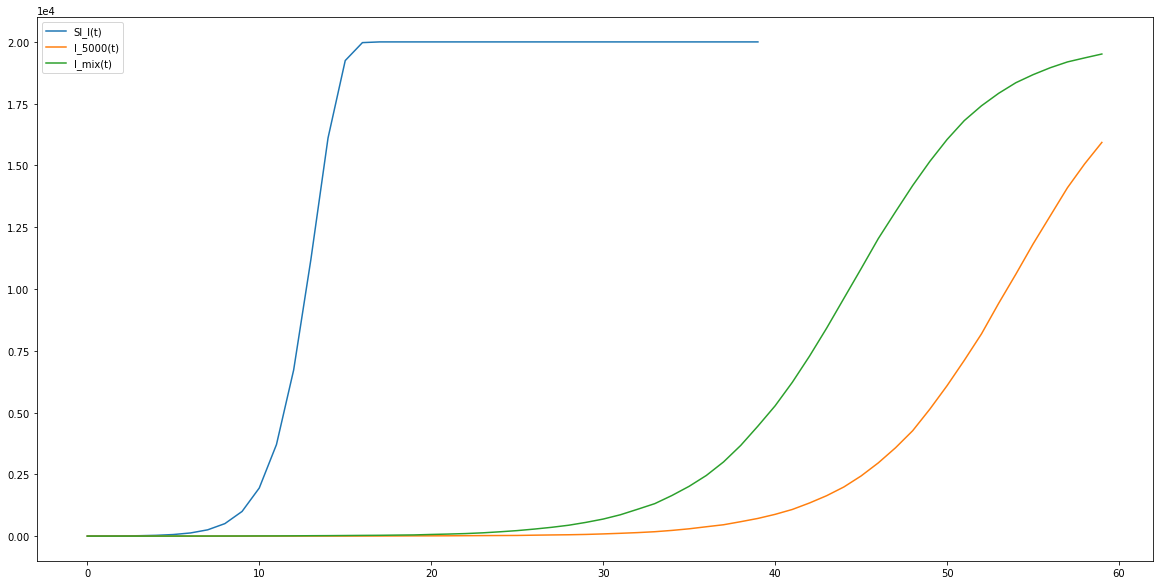

In [44]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 20000 # S + I = N
beta = 1
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations)
figure = plt.figure(figsize=(20, 10))

SI_I, = plt.plot(I_comp, label='SI_I(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_mix(t)')

plt.legend(handles=[SI_I, I_5000, I_mix])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

#plt.xlim([0, 200])
plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus['Nombre de contaminés'].values.tolist(),S_comp)).mean())

### 50000 individus

In [45]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur16/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur16/population50000"

In [46]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   741  4394450        5      3  4395200


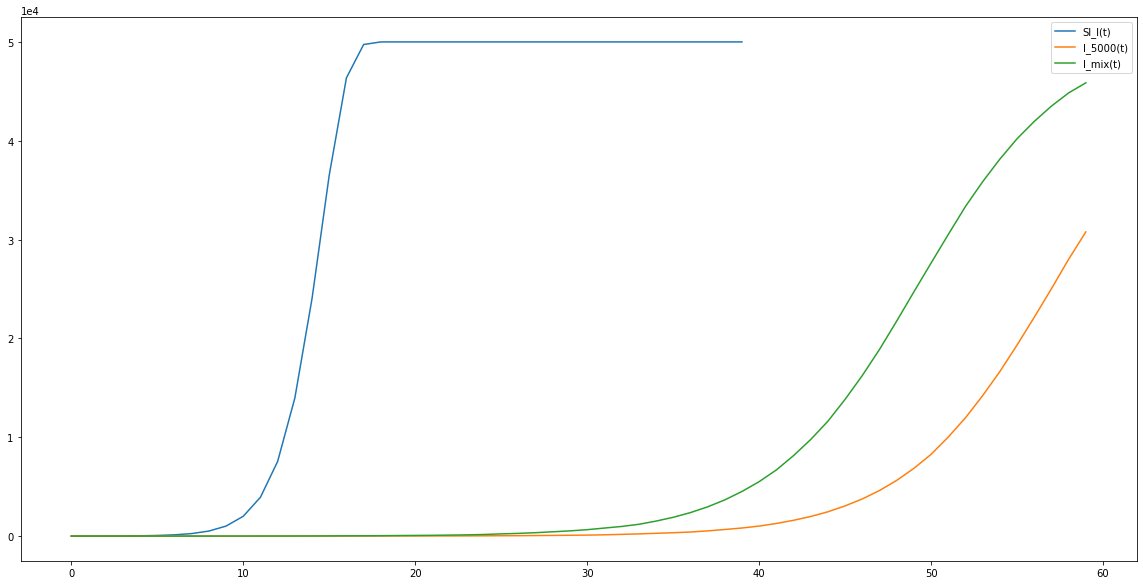

In [47]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 50000 # S + I = N
beta = 1
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations)
figure = plt.figure(figsize=(20, 10))

SI_I, = plt.plot(I_comp, label='SI_I(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_mix(t)')

plt.legend(handles=[SI_I, I_5000, I_mix])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

#plt.xlim([0, 200])
plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus['Nombre de contaminés'].values.tolist(),S_comp)).mean())

### 100000 individus

In [48]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur16/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur16/population100000"

In [49]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init     Run  Mesures  Close   Total
0   887  745596        0      0  746485


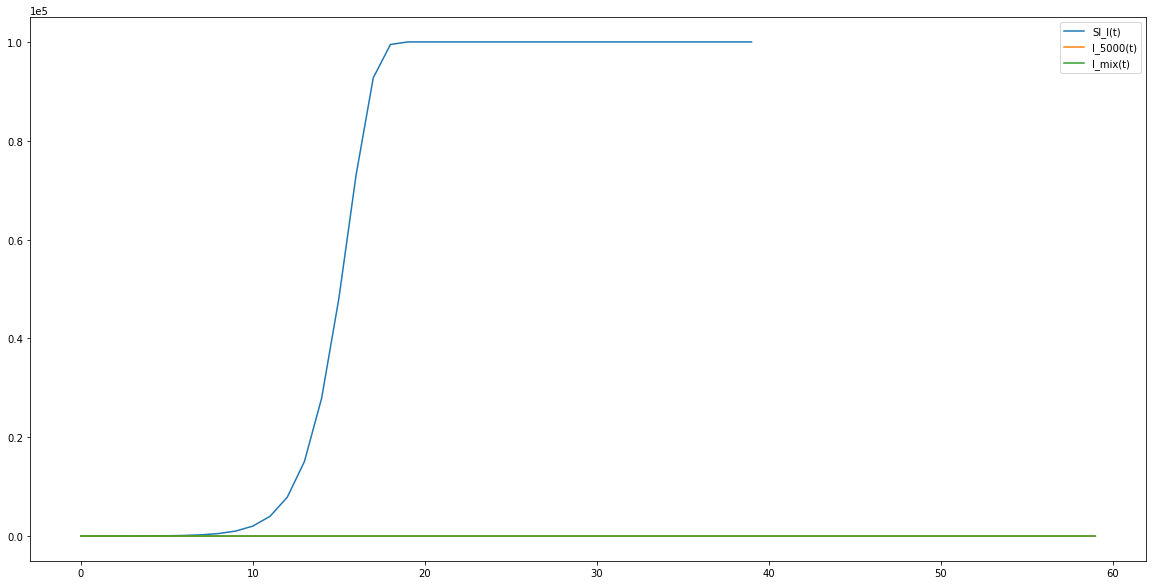

In [50]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 100000 # S + I = N
beta = 1
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations)
figure = plt.figure(figsize=(20, 10))

SI_I, = plt.plot(I_comp, label='SI_I(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_mix(t)')

plt.legend(handles=[SI_I, I_5000, I_mix])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

#plt.xlim([0, 200])
plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus['Nombre de contaminés'].values.tolist(),S_comp)).mean())